<h1 style='text-align:center; text-transform: uppercase; text-decoration: underline;'>PROYECTO INTEGRADOR</h1>
<br>
<p style='font-size:15px;'><span style='text-decoration: underline;'>Materia</span>: Procesamiento de Señales.</p>
<p style='font-size:15px;'><span style='text-decoration: underline;'>Tema</span>: Transformaciones conformes.</p>
<p style='font-size:15px;'><span style='text-decoration: underline;'>Alumno</span>: Pedro Tagliani.</p>
<p style='font-size:15px;'><span style='text-decoration: underline;'>Fecha de entrega</span>: 03/10/2023.</p>
<br>

<h3>Librerías a utilizar:</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ct
from IPython.core.display import HTML as Center

In [2]:
Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

<h2>1. Señal a filtrar:</h2>

<p style="text-align: justify;">La señal será muestreada a una frecuencia de muestreo fija y tendrá la siguiente forma:</p>
<br>
$$y(t) = m_1 \sin(2\pi f_1 t) + m_2 \sin(2\pi f_2 t)$$

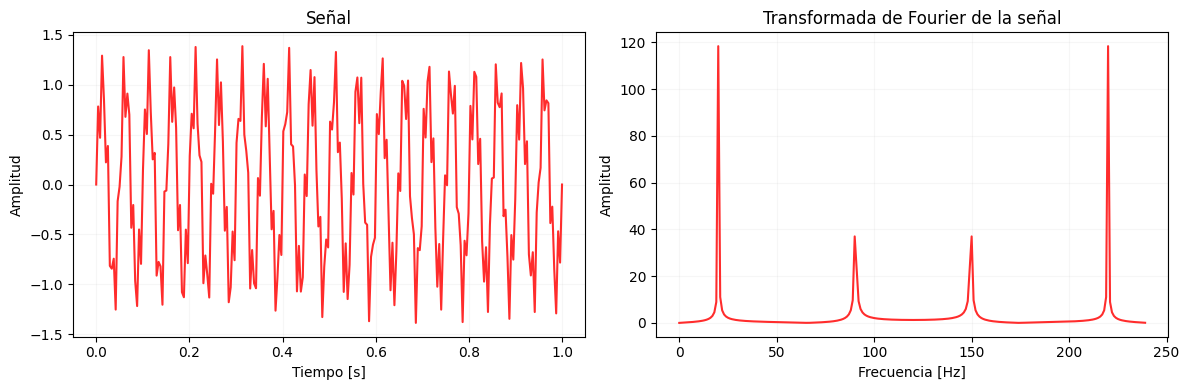

In [3]:
# Frecuencia de muestreo [muestras/segundo]:
fs = 240
Ts = 1/fs

# Tiempo [s]:
ti = 0
tf = 1
t = np.linspace(ti,tf,(tf-ti)*fs)

# Muestras:
n = np.arange(ti/Ts,tf/Ts) # t=n*Ts --> n=t/Ts
N = len(n)

# Frecuencia de las señales en [ciclos/segundos]:
f1 = 20
f2 = 90

# Magnitud de las señales:
mag1 = 1
mag2 = 0.4

# Se arma la señal:
signal1 = mag1*np.sin(2*np.pi*f1*t) + mag2*np.sin(2*np.pi*f2*t)

# Se calcula su Transformada de Fourier:
signal1_fft = np.fft.fft(signal1)
fcycles = np.arange(0,fs,fs/N)

fig1 = plt.figure(figsize=(12,4))

ax1 = fig1.add_subplot(1,2,1)
ax1.plot(t,signal1, c='#ff2c2c')
ax1.set_title(f'Señal')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud')
ax1.grid(alpha=0.1)

ax2 = fig1.add_subplot(1,2,2)
ax2.plot(fcycles,np.abs(signal1_fft), c='#ff2c2c')
ax2.set_title(f'Transformada de Fourier de la señal')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Amplitud')
ax2.grid(alpha=0.1)

fig1.tight_layout()
plt.show()

<h2>2. Función de transferencia del filtro analógico:</h2>

In [4]:
# https://saturncloud.io/blog/analog-vs-digital-version-of-butterworth-filter-in-scipy/#:~:text=The%20analog%20Butterworth%20filter%20is,order%20and%20the%20cutoff%20frequency.

wc = 2*np.pi*30 # Frecuencia de corte [rad/s]
n = 4 # Orden del filtro

# Filtro butterworth análogo:
b_s, a_s = signal.butter(n, wc, 'low', analog=True)

print(f'Coeficientes del polinomio del numerador de la función transferencia del filtro: {b_s}.')
print(f'Coeficientes del polinomio del denominador de la función transferencia del filtro: {a_s}.')

Coeficientes del polinomio del numerador de la función transferencia del filtro: [1.26242182e+09].
Coeficientes del polinomio del denominador de la función transferencia del filtro: [1.00000000e+00 4.92562633e+02 1.21308974e+05 1.75010340e+07
 1.26242182e+09].


<p style="text-align: justify;">Se arma la función transferencia del filtro Butterworth pasabajos en el dominio de S:</p>

In [5]:
# https://python-control.readthedocs.io/en/0.9.4/generated/control.tf.html#control.tf

butter_tf_s = ct.tf(b_s,a_s)

print('Función transferencia del filtro Butterworth diseñado:')
display(butter_tf_s)

Función transferencia del filtro Butterworth diseñado:


TransferFunction(array([1.26242182e+09]), array([1.00000000e+00, 4.92562633e+02, 1.21308974e+05, 1.75010340e+07,
       1.26242182e+09]))

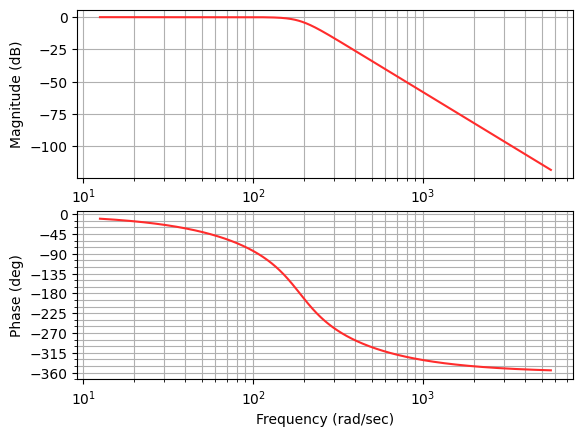

In [6]:
# Diagrama de Boode:
w = np.logspace(np.log10(min([f1,f2])*2*np.pi/10), np.log10(max([f1,f2])*2*np.pi*10), 1000)
mag, phase, w = ct.bode_plot(butter_tf_s,w, color='#ff2c2c')

# https://python-control.readthedocs.io/en/0.9.4/generated/control.bode_plot.html#control.bode_plot

Polo N°1: (-72.134+174.147j)
Polo N°2: (-72.134-174.147j)
Polo N°3: (-174.147+72.134j)
Polo N°4: (-174.147-72.134j)


La función de transferencia no tiene ceros.


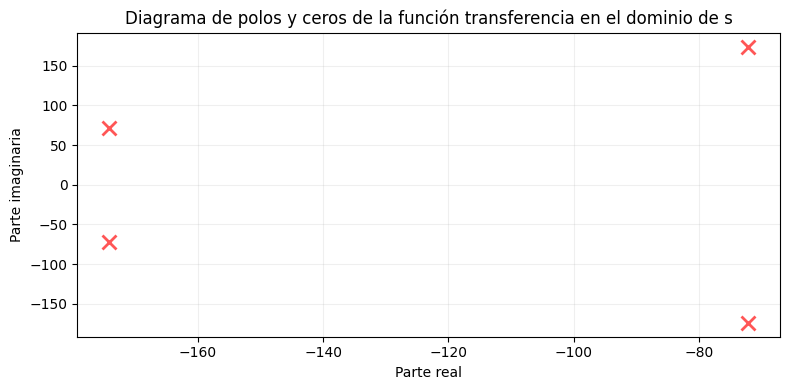

In [7]:
poles_s = ct.poles(butter_tf_s)
zeros_s = ct.zeros(butter_tf_s)

if (len(poles_s) == 0):
    print('La función de transferencia no tiene polos.')
else:
    for i,pole in enumerate(poles_s):
        print(f'Polo N°{i+1}: {np.round(pole,3)}')

print('\n')
if (len(zeros_s) == 0):
    print('La función de transferencia no tiene ceros.')
else:
    for i,zero in enumerate(zeros_s): 
        print(f'Cero N°{i+1}: {np.round(zero,3)}')

fig5 = plt.figure(figsize=(8,4))

ax1 = fig5.add_subplot(1,1,1)
ax1.plot(poles_s.real, poles_s.imag, 'x', markersize=10, alpha=0.8, color='#ff2c2c', markeredgewidth = 2)
ax1.plot(zeros_s.real, zeros_s.imag, 'o', markersize=10, alpha=0.8, color='none', markeredgewidth = 2, markeredgecolor = '#ff2c2c')
ax1.set_title('Diagrama de polos y ceros de la función transferencia en el dominio de s')
ax1.set_xlabel('Parte real')
ax1.set_ylabel('Parte imaginaria')
ax1.grid(alpha = 0.2)

fig5.tight_layout()
plt.show()

<h2>3. Transformada bilineal sin pre-warping:</h2>

<img src='Archivos/Mapeo Bilineal.png' width="600" height="300" style="padding: 20px;">

<p style="text-align: justify;">Para implementar el filtro en hardware es necesario discretizar la función transferencia pasando al dominio de Z. Por lo tanto, se empleará la transformada bilineal que viene dada por la siguiente ecuación:</p>
$$s = \frac{1}{T} \ln (z)  \approx \frac{2}{T} \left( \frac{z-1}{z+1} \right) = \frac{2}{T} \left( \frac{1-z^{-1}}{1+z^{-1}} \right)$$
<br>
<p style="text-align: justify;">Por otro lado, la inversa de la transformada bilineal se define como:</p>
$$z = \frac{e^{\frac{T}{2}s}}{e^{-\frac{T}{2}s}} = \frac{1 + \frac{T}{2}s}{1 - \frac{T}{2}s}$$

In [8]:
# A través de la transformada bilineal se pasa la función transferencia en el dominio S al dominio de Z:
butter_tf_z_bilinear = ct.sample_system(butter_tf_s, Ts, method='bilinear')

# https://observablehq.com/@fedesantana/filtros-digitales-transformada-bilineal

print('Función transferencia del filtro Butterworth en Z empleando la Transformada Bilineal:')
display(butter_tf_z_bilinear)

Función transferencia del filtro Butterworth en Z empleando la Transformada Bilineal:


TransferFunction(array([0.00869615, 0.03478461, 0.05217692, 0.03478461, 0.00869615]), array([ 1.        , -2.06263428,  1.86112855, -0.79314494,  0.13378912]), 0.004166666666666667)

Polo N°1: (0.581+0.499j)
Polo N°2: (0.581-0.499j)
Polo N°3: (0.45+0.16j)
Polo N°4: (0.45-0.16j)


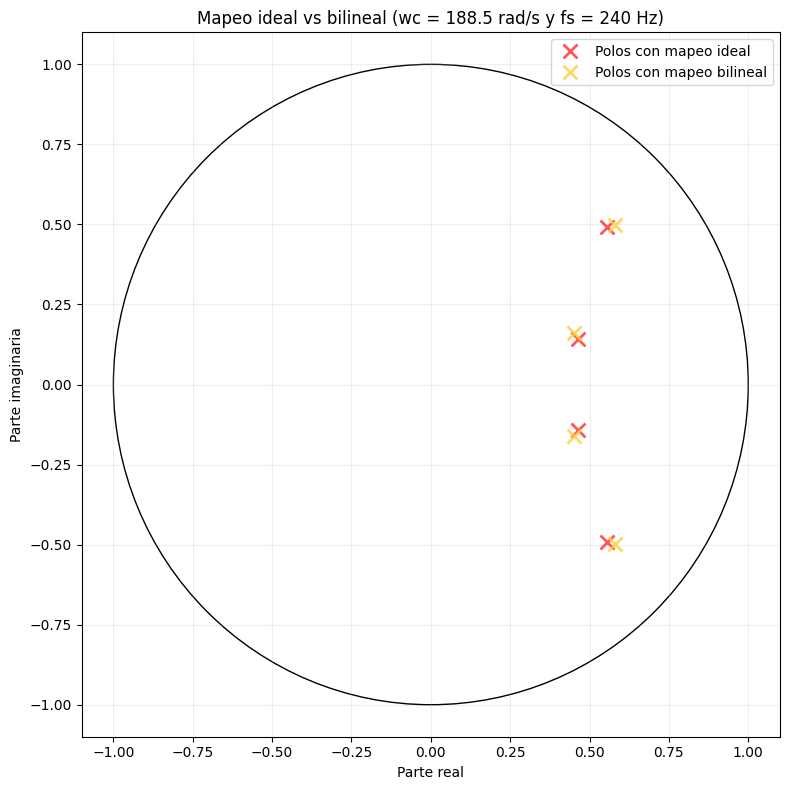

In [9]:
poles_z_ideal = []
zeros_z_ideal = []

# Mapeo ideal: z = e^(s*Ts)

if (len(poles_s) == 0):
    pass
else:
    for pole in poles_s:
        poles_z_ideal.append(np.exp(pole*Ts))

# if (len(zeros_s) == 0):
#         pass
# else:
#     for zero in zeros_s:
#         zeros_z_ideal.append(np.exp(zero*Ts))
    
poles_z_bilinear = ct.poles(butter_tf_z_bilinear)
zeros_z_bilinear = ct.zeros(butter_tf_z_bilinear)

if (len(poles_z_bilinear) == 0):
    print('La función de transferencia no tiene polos.')
else:
    for i,pole in enumerate(poles_z_bilinear):
        print(f'Polo N°{i+1}: {np.round(pole,3)}')

# print('\n')
# if (len(zeros_z_bilinear) == 0):
#     print('La función de transferencia no tiene ceros.')
# else:
#     for i,zero in enumerate(zeros_z_bilinear): 
#         print(f'Cero N°{i+1}: {np.round(zero,3)}')

fig6 = plt.figure(figsize=(8,8))

ax1 = fig6.add_subplot(1,1,1)
ax1.plot(np.array(poles_z_ideal).real, np.array(poles_z_ideal).imag, 'x', markersize=10, alpha=0.8, color='#ff2c2c', markeredgewidth = 2, label = 'Polos con mapeo ideal')
ax1.plot(poles_z_bilinear.real, poles_z_bilinear.imag, 'x', markersize=10, alpha=0.8, color='#fccf3e', markeredgewidth = 2, label = 'Polos con mapeo bilineal')
circ = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='None')
ax1.add_patch(circ)
ax1.set_title(f'Mapeo ideal vs bilineal (wc = {np.round(wc,2)} rad/s y fs = {np.round(fs,2)} Hz)')
ax1.set_xlabel('Parte real')
ax1.set_ylabel('Parte imaginaria')
ax1.grid(alpha = 0.2)
ax1.legend()

fig6.tight_layout()
plt.show()

<p style="text-align: justify;">La relación entre la frecuencia analógica y la frecuencia discreta es no lineal. Cuando la frecuencia analógica es baja, la frecuencia discreta se asemeja a ella. No obstante, a medida que aumenta la frecuencia analógica, la diferencia entre ambas se incrementa, ya que la frecuencia discreta se aproxima asintóticamente a la frecuencia de Nyquist. Este efecto de la transformada bilineal se llama warp, o alteración en frecuencia.</p>

$$\omega_a = \frac{2}{T} \tan \left(\omega_d \frac{T_s}{2}\right)$$
<br>
$$\omega_d = \frac{2}{T} \arctan \left(\omega_a \frac{T_s}{2}\right)$$

La frecuencia de Nyquist es de 753.98 Hz.


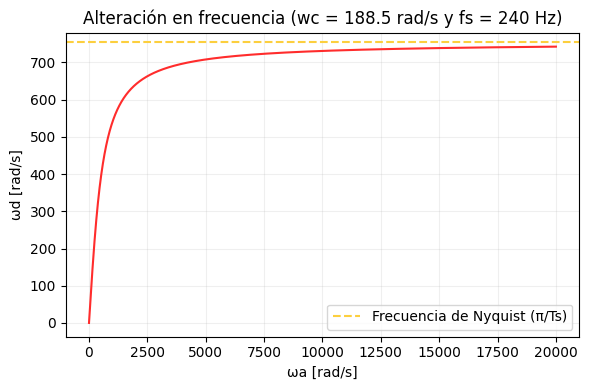

La frecuencia de corte analógica de 188.5 rad/s se mapea en 179.61 rad/s aplicando la transformada bilineal sin pre-warping con una frecuencia de muestreo de 240 Hz.


In [10]:
wa = np.linspace(0.1,20000,10000) # Frecuencia analógica [rad/s]
wd = (2/Ts)*(np.arctan(wa*(Ts/2))) # Frecuencia digital [rad/s]

f_nyquist = 2*np.pi*(fs/2)
print(f'La frecuencia de Nyquist es de {np.round(f_nyquist,2)} Hz.')

fig7 = plt.figure(figsize=(6,4))

ax1 = fig7.add_subplot(1,1,1)
ax1.plot(wa,wd,color='#ff2c2c')
ax1.set_title(f'Alteración en frecuencia (wc = {np.round(wc,2)} rad/s y fs = {np.round(fs,2)} Hz)')
ax1.axhline(y = f_nyquist, color='#fccf3e', linestyle = 'dashed', label = 'Frecuencia de Nyquist (π/Ts)')
ax1.set_xlabel('ωa [rad/s]')
ax1.set_ylabel('ωd [rad/s]')
ax1.grid(alpha = 0.2)
# ax1.set_xlim(1,1000)
ax1.legend()

fig7.tight_layout()
plt.show()

wd_sys = (2/Ts)*(np.arctan(wc*(Ts/2)))
print(f'La frecuencia de corte analógica de {np.round(wc,2)} rad/s se mapea en {np.round(wd_sys,2)} rad/s aplicando la transformada bilineal sin pre-warping con una frecuencia de muestreo de {fs} Hz.')

# https://en.wikipedia.org/wiki/Bilinear_transform
# https://youtu.be/NRbGPgcLhU0?si=U7-gPLF9NK5ZJZvX
# https://youtu.be/5RLMpdbt6B0?si=pxw3FZWYfygzw8dD

<p style="text-align: justify;">A partir de la función de transferencia, es posible aplicar la inversa de la transformada Z para obtener la ecuación en diferencias. Sin embargo, al utilizar la función lfilter de Scipy, en lugar de derivar la ecuación en diferencias a partir de la función de transferencia, se proporcionan directamente los coeficientes necesarios para aplicar el filtro deseado a la señal:</p>

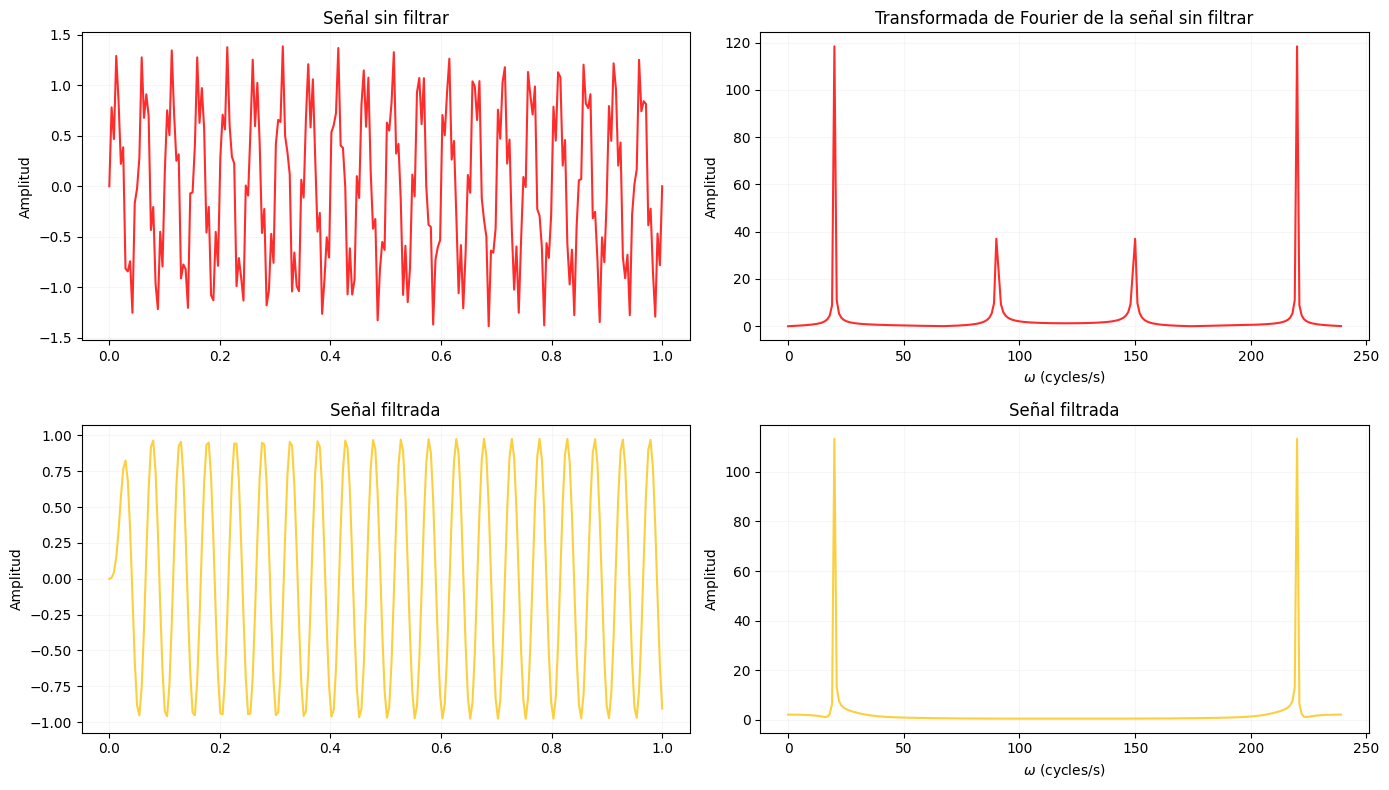

In [11]:
# https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

b_z_bilinear = butter_tf_z_bilinear.num[0][0]
a_z_bilinear = butter_tf_z_bilinear.den[0][0]

signal1_filtered_bilinear = signal.lfilter(b_z_bilinear,a_z_bilinear,signal1)

signal1_filtered_fft_bilinear = np.fft.fft(signal1_filtered_bilinear)
fcycles = np.arange(0,fs,fs/N)

fig3 = plt.figure(figsize=(14,8))

ax1 = fig3.add_subplot(2,2,1)
ax1.set_title('Señal sin filtrar')
ax1.plot(t,signal1, c='#ff2c2c')
ax1.set_ylabel("Amplitud")
ax1.grid(alpha=0.1)

ax2 = fig3.add_subplot(2,2,2)
ax2.set_title('Transformada de Fourier de la señal sin filtrar')
ax2.plot(fcycles,abs(signal1_fft), c='#ff2c2c')
ax2.set_xlabel("$\omega$ (cycles/s)")
ax2.set_ylabel("Amplitud")
ax2.grid(alpha=0.1)

ax3 = fig3.add_subplot(2,2,3)
ax3.set_title('Señal filtrada')
ax3.plot(t,signal1_filtered_bilinear, c='#fccf3e')
ax3.set_ylabel("Amplitud")
ax3.grid(alpha=0.1)

ax4 = fig3.add_subplot(2,2,4)
ax4.set_title('Señal filtrada')
ax4.plot(fcycles,abs(signal1_filtered_fft_bilinear), c='#fccf3e')
ax4.set_xlabel("$\omega$ (cycles/s)")
ax4.set_ylabel("Amplitud")
ax4.grid(alpha=0.1)

fig3.tight_layout()
plt.show()

<h2>4. Transformada de Euler:</h2>

<img src='Archivos/Mapeo Euler.png' width="600" height="300" style="padding: 20px;">

<p style="text-align: justify;">La Transformada de Euler que viene dada por la siguiente ecuación:</p>
<br>
$$s = \frac{1-z^{-1}}{T}$$

In [12]:
# A través de la transformada de Euler se pasa la función transferencia en el dominio S al dominio de Z:
butter_tf_z_euler = ct.sample_system(butter_tf_s, Ts, method='euler')

print('Función transferencia del filtro Butterworth en Z empleando la Transformada de Euler:')
display(butter_tf_z_euler)

Función transferencia del filtro Butterworth en Z empleando la Transformada de Euler:


TransferFunction(array([ 4.66293670e-15, -7.77156117e-15,  4.32986980e-15,  3.80504262e-01]), array([ 1.        , -1.94765569,  1.94902566, -0.78909508,  0.16822938]), 0.004166666666666667)

Polo N°1: (0.699+0.726j)
Polo N°2: (0.699-0.726j)
Polo N°3: (0.274+0.301j)
Polo N°4: (0.274-0.301j)


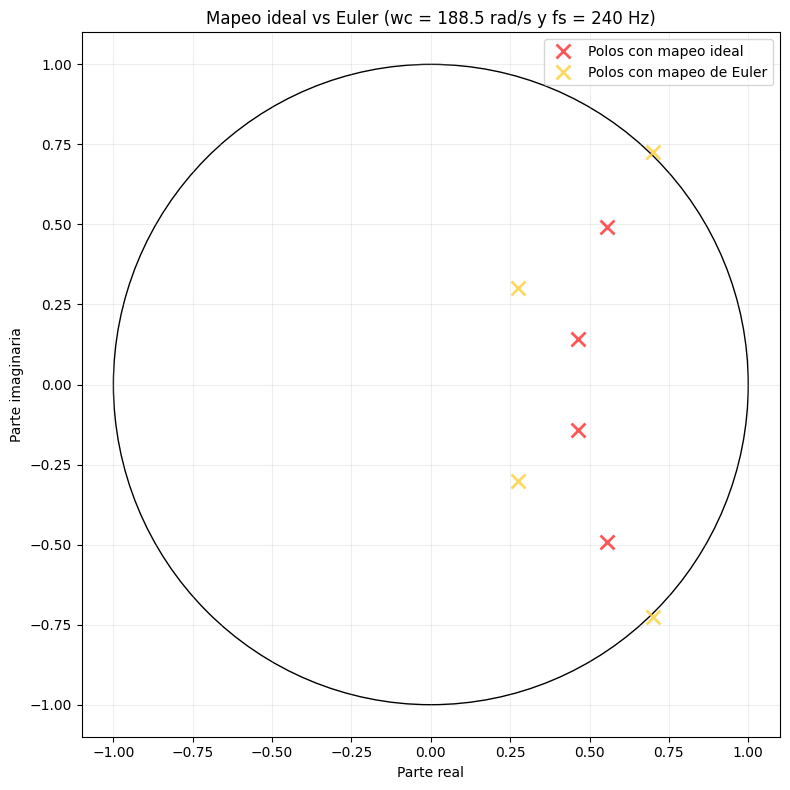

In [19]:
poles_z_euler = ct.poles(butter_tf_z_euler)
zeros_z_euler = ct.zeros(butter_tf_z_euler)

if (len(poles_z_euler) == 0):
    print('La función de transferencia no tiene polos.')
else:
    for i,pole in enumerate(poles_z_euler):
        print(f'Polo N°{i+1}: {np.round(pole,3)}')

# print('\n')
# if (len(zeros_z_euler) == 0):
#     print('La función de transferencia no tiene ceros.')
# else:
#     for i,zero in enumerate(zeros_z_euler): 
#         print(f'Cero N°{i+1}: {np.round(zero,3)}')

fig8 = plt.figure(figsize=(8,8))

ax1 = fig8.add_subplot(1,1,1)
ax1.plot(np.array(poles_z_ideal).real, np.array(poles_z_ideal).imag, 'x', markersize=10, alpha=0.8, color='#ff2c2c', markeredgewidth = 2, label = 'Polos con mapeo ideal')
ax1.plot(poles_z_euler.real, poles_z_euler.imag, 'x', markersize=10, alpha=0.8, color='#fccf3e', markeredgewidth = 2, label = 'Polos con mapeo de Euler')
circ = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='None')
ax1.add_patch(circ)
ax1.set_title(f'Mapeo ideal vs Euler (wc = {np.round(wc,2)} rad/s y fs = {np.round(fs,2)} Hz)')
ax1.set_xlabel('Parte real')
ax1.set_ylabel('Parte imaginaria')
ax1.grid(alpha = 0.2)
ax1.legend()

fig8.tight_layout()
plt.show()

<p style="text-align: justify;">Al aplicar la Transformación de Euler, para que el eje imaginario del plano $s$ se mapee aceptablemente en el círculo unitario del plano $z$, la restricción es que $\frac{\omega_d}{f_s} < \frac{\pi}{6}$. Suponiendo que se dispone de una secuencia $x[n]$, con un período de muestro de $T = \frac{1}{f_s}$. Por el teorema de muestreo, se tiene que $f_s > 2f_M$, con $f_M$ como la frecuencia máxima presente en $x[n]$. Además, como $\omega_d = 2 \pi f$, y teniendo en cuenta la restricción $\frac{\omega_d}{f_s} < \frac{\pi}{6}$, se tendrá que $\frac{f_s}{12} > f_M$ para así cumplir con la condición de que el eje imaginario del plano $s$ se mapee aproximadamente sobre la circunferencia unitaria en el plano $z$.</p>
<p style="text-align: justify;">Es decir, la transformación de Euler resulta apropiada cuando se tiene una frecuencia de muestreo muy alta y se busca analizar lo que pasa en bajas frecuencias.</p>


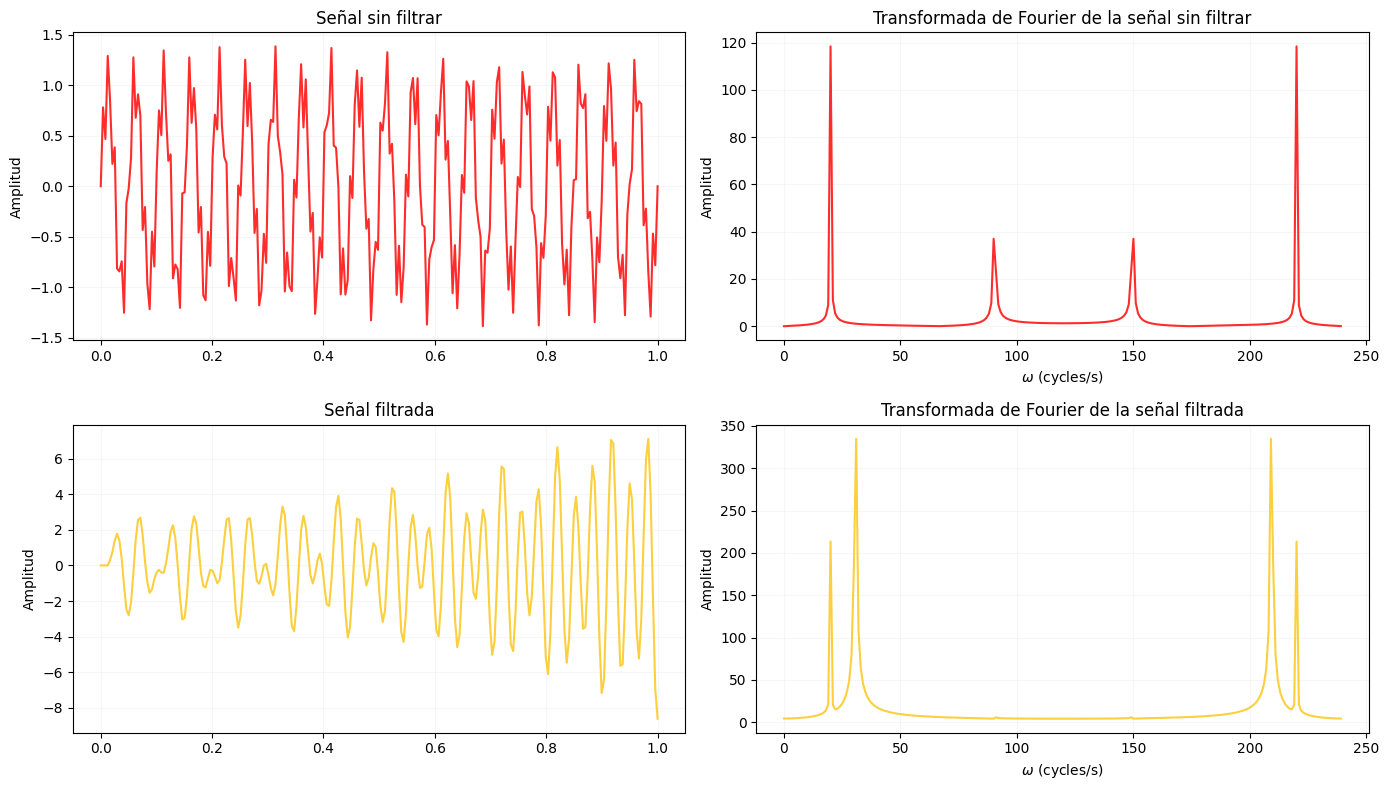

In [14]:
b_z_euler = butter_tf_z_euler.num[0][0]
a_z_euler = butter_tf_z_euler.den[0][0]

signal1_filtered_euler = signal.lfilter(b_z_euler,a_z_euler,signal1)

signal1_filtered_fft_euler = np.fft.fft(signal1_filtered_euler)
fcycles = np.arange(0,fs,fs/N)

fig4 = plt.figure(figsize=(14,8))

ax1 = fig4.add_subplot(2,2,1)
ax1.set_title('Señal sin filtrar')
ax1.plot(t,signal1, c='#ff2c2c')
ax1.set_ylabel("Amplitud")
ax1.grid(alpha=0.1)

ax2 = fig4.add_subplot(2,2,2)
ax2.set_title('Transformada de Fourier de la señal sin filtrar')
ax2.plot(fcycles,abs(signal1_fft), c='#ff2c2c')
ax2.set_xlabel("$\omega$ (cycles/s)")
ax2.set_ylabel("Amplitud")
ax2.grid(alpha=0.1)

ax3 = fig4.add_subplot(2,2,3)
ax3.set_title('Señal filtrada')
ax3.plot(t,signal1_filtered_euler, c='#fccf3e')
ax3.set_ylabel("Amplitud")
ax3.grid(alpha=0.1)

ax4 = fig4.add_subplot(2,2,4)
ax4.set_title('Transformada de Fourier de la señal filtrada')
ax4.plot(fcycles,abs(signal1_filtered_fft_euler), c='#fccf3e')
ax4.set_xlabel("$\omega$ (cycles/s)")
ax4.set_ylabel("Amplitud")
ax4.grid(alpha=0.1)

fig4.tight_layout()
plt.show()

<p style="text-align: justify;">En esta situación, el mapeo resultó inadecuado y llevó al sistema a volverse inestable. Esto se debe a que la frecuencia máxima que se puede representar adecuadamente con una frecuencia de muestreo de 240 Hz es de 20 Hz. Sin embargo, en la señal analizada, la frecuencia máxima es de 90 Hz.</p>
<br>
$$\frac{f_s}{12} > f_M \longrightarrow \frac{240 Hz}{12} > f_M \longrightarrow 20 Hz > f_M$$

<p style="text-align: justify;">Por lo tanto, la frecuencia de muestreo mínima para que el mapeo en este caso resulte adecuado sería:</p>
<br>
$$\frac{f_s}{12} > f_M \longrightarrow \frac{f_s}{12} > 90 Hz \longrightarrow f_s > 1080 Hz$$

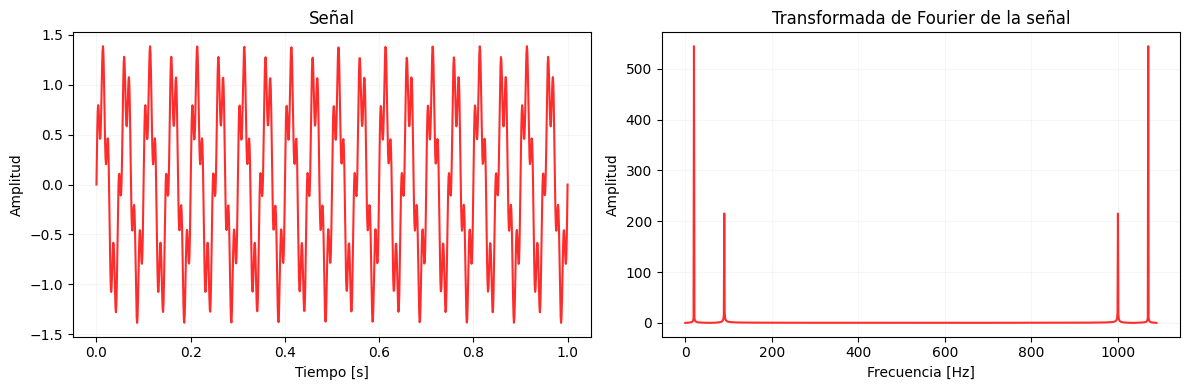

In [15]:
fs2 = 1090
Ts2 = 1/fs2

# Tiempo [s]:
ti2 = 0
tf2 = 1
t2 = np.linspace(ti2,tf2,(tf2-ti2)*fs2)

# Muestras:
n2 = np.arange(ti2/Ts2,tf2/Ts2) # t=n*Ts --> n=t/Ts
N2 = len(n2)

signal2 = mag1*np.sin(2*np.pi*f1*t2) + mag2*np.sin(2*np.pi*f2*t2)

# Se calcula su Transformada de Fourier:
signal2_fft = np.fft.fft(signal2)
fcycles2 = np.arange(0,fs2,fs2/N2)

fig9 = plt.figure(figsize=(12,4))

ax1 = fig9.add_subplot(1,2,1)
ax1.plot(t2,signal2, c='#ff2c2c')
ax1.set_title(f'Señal')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Amplitud')
ax1.grid(alpha=0.1)

ax2 = fig9.add_subplot(1,2,2)
ax2.plot(fcycles2,np.abs(signal2_fft), c='#ff2c2c')
ax2.set_title(f'Transformada de Fourier de la señal')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Amplitud')
ax2.grid(alpha=0.1)

fig9.tight_layout()
plt.show()

In [16]:
butter_tf_z_euler2 = ct.sample_system(butter_tf_s, Ts2, method='euler')

print('Función transferencia del filtro Butterworth en Z empleando la Transformada de Euler:')
display(butter_tf_z_euler2)

Función transferencia del filtro Butterworth en Z empleando la Transformada de Euler:


TransferFunction(array([-1.77635684e-15,  5.32907052e-15, -4.88498131e-15,  8.94331444e-04]), array([ 1.        , -3.54810768,  4.74642636, -2.83501569,  0.63759133]), 0.0009174311926605505)

Polo N°1: (0.934+0.16j)
Polo N°2: (0.934-0.16j)
Polo N°3: (0.84+0.066j)
Polo N°4: (0.84-0.066j)


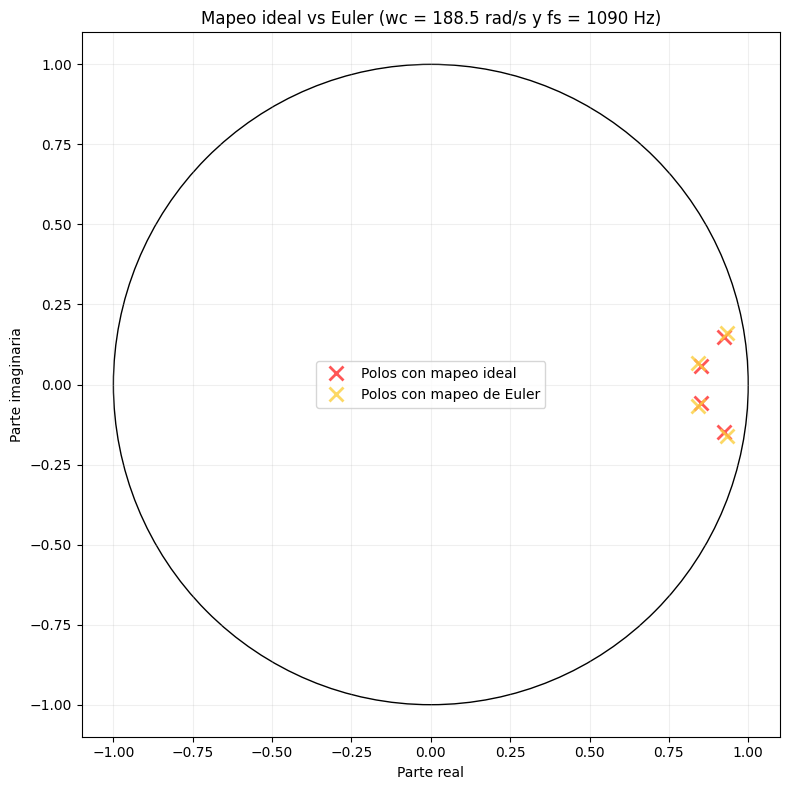

In [17]:
poles_z_ideal2 = []
zeros_z_ideal2 = []

# Mapeo ideal: z = e^(s*Ts)

if (len(poles_s) == 0):
    pass
else:
    for pole in poles_s:
        poles_z_ideal2.append(np.exp(pole*Ts2))

# if (len(zeros_s) == 0):
#         pass
# else:
#     for zero in zeros_s:
#         zeros_z_ideal2.append(np.exp(zero*Ts2))

poles_z_euler2 = ct.poles(butter_tf_z_euler2)
zeros_z_euler2 = ct.zeros(butter_tf_z_euler2)

if (len(poles_z_euler2) == 0):
    print('La función de transferencia no tiene polos.')
else:
    for i,pole in enumerate(poles_z_euler2):
        print(f'Polo N°{i+1}: {np.round(pole,3)}')

# print('\n')
# if (len(zeros_z_euler) == 0):
#     print('La función de transferencia no tiene ceros.')
# else:
#     for i,zero in enumerate(zeros_z_euler): 
#         print(f'Cero N°{i+1}: {np.round(zero,3)}')

fig11 = plt.figure(figsize=(8,8))

ax1 = fig11.add_subplot(1,1,1)
ax1.plot(np.array(poles_z_ideal2).real, np.array(poles_z_ideal2).imag, 'x', markersize=10, alpha=0.8, color='#ff2c2c', markeredgewidth = 2, label = 'Polos con mapeo ideal')
ax1.plot(poles_z_euler2.real, poles_z_euler2.imag, 'x', markersize=10, alpha=0.8, color='#fccf3e', markeredgewidth = 2, label = 'Polos con mapeo de Euler')
circ = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='None')
ax1.add_patch(circ)
ax1.set_title(f'Mapeo ideal vs Euler (wc = {np.round(wc,2)} rad/s y fs = {np.round(fs2,2)} Hz)')
ax1.set_xlabel('Parte real')
ax1.set_ylabel('Parte imaginaria')
ax1.grid(alpha = 0.2)
ax1.legend()

fig11.tight_layout()
plt.show()

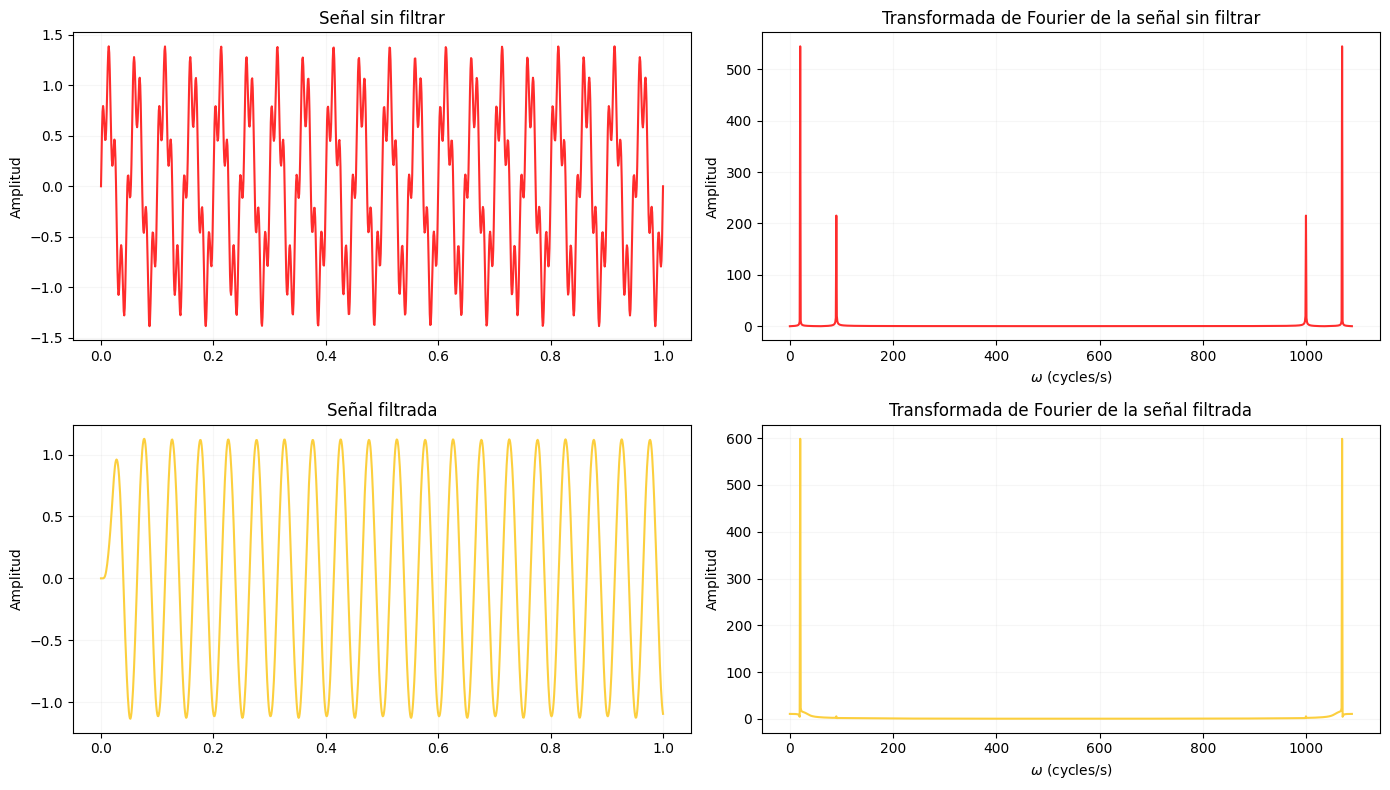

In [18]:
b_z_euler2 = butter_tf_z_euler2.num[0][0]
a_z_euler2 = butter_tf_z_euler2.den[0][0]

signal2_filtered_euler = signal.lfilter(b_z_euler2,a_z_euler2,signal2)

signal2_filtered_fft_euler = np.fft.fft(signal2_filtered_euler)
fcycles2 = np.arange(0,fs2,fs2/N2)

fig10 = plt.figure(figsize=(14,8))

ax1 = fig10.add_subplot(2,2,1)
ax1.set_title('Señal sin filtrar')
ax1.plot(t2,signal2, c='#ff2c2c')
ax1.set_ylabel("Amplitud")
ax1.grid(alpha=0.1)

ax2 = fig10.add_subplot(2,2,2)
ax2.set_title('Transformada de Fourier de la señal sin filtrar')
ax2.plot(fcycles2,abs(signal2_fft), c='#ff2c2c')
ax2.set_xlabel("$\omega$ (cycles/s)")
ax2.set_ylabel("Amplitud")
ax2.grid(alpha=0.1)

ax3 = fig10.add_subplot(2,2,3)
ax3.set_title('Señal filtrada')
ax3.plot(t2,signal2_filtered_euler, c='#fccf3e')
ax3.set_ylabel("Amplitud")
ax3.grid(alpha=0.1)

ax4 = fig10.add_subplot(2,2,4)
ax4.set_title('Transformada de Fourier de la señal filtrada')
ax4.plot(fcycles2,abs(signal2_filtered_fft_euler), c='#fccf3e')
ax4.set_xlabel("$\omega$ (cycles/s)")
ax4.set_ylabel("Amplitud")
ax4.grid(alpha=0.1)

fig10.tight_layout()
plt.show()